![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf  #Yahoo Finance
from  matplotlib.colors import LinearSegmentedColormap

In [2]:
#DATES
start = datetime.datetime(2022, 12, 31)
end = datetime.datetime(2023, 12, 31)
timeframe = end - start
start_year = start.year

#ASSETS
#Magnificent 7 stocks
tickers = ['AAPL','GOOG','META','MSFT','NVDA','AMZN','TSLA']

#COLORS
my_colors = ['darkblue','royalblue','dodgerblue','dimgrey','slategrey','lightgrey','black']

In [9]:
min_value = 0
max_value = 0 


#CREATE DICTIONARY TO STORE DATAFRAMES

DataFrameDict = {elem : pd.DataFrame() for elem in tickers}
for key in DataFrameDict.keys():
    prices = yf.Ticker(key)
    prices_hist = prices.history(period="max")
    prices_hist.reset_index(inplace=True)
    prices_hist['Date'] = pd.to_datetime(prices_hist['Date'], utc=True).dt.date  
    prices_hist['Date'] = pd.to_datetime(prices_hist['Date'])
    prices_hist = prices_hist.loc[(prices_hist['Date'] >=start)&(prices_hist['Date'] <= end)]
    DataFrameDict[key] = prices_hist[:]
    DataFrameDict[key]['Dividends'].iloc[-1]=0
    DataFrameDict[key]['perc_Dividends']=DataFrameDict[key]['Dividends']/DataFrameDict[key]['Close']
    DataFrameDict[key]['ret'] = DataFrameDict[key]['Close']/ DataFrameDict[key]['Close'].shift(1)-1+DataFrameDict[key]['perc_Dividends']
    DataFrameDict[key]['cum_ret']=(1 + DataFrameDict[key]['ret']).cumprod()-1
    DataFrameDict[key]['cum_ret'].iloc[0]=0    
    DataFrameDict[key].reset_index(inplace=True)
    if np.array([DataFrameDict[key]['cum_ret'].min()]) < min_value:
        min_value = np.array([DataFrameDict[key]['cum_ret'].min()])[0]
    if np.array([DataFrameDict[key]['cum_ret'].max()]) > max_value:
        max_value = np.array([DataFrameDict[key]['cum_ret'].max()])[0]
        
my_range = abs(min_value - max_value)

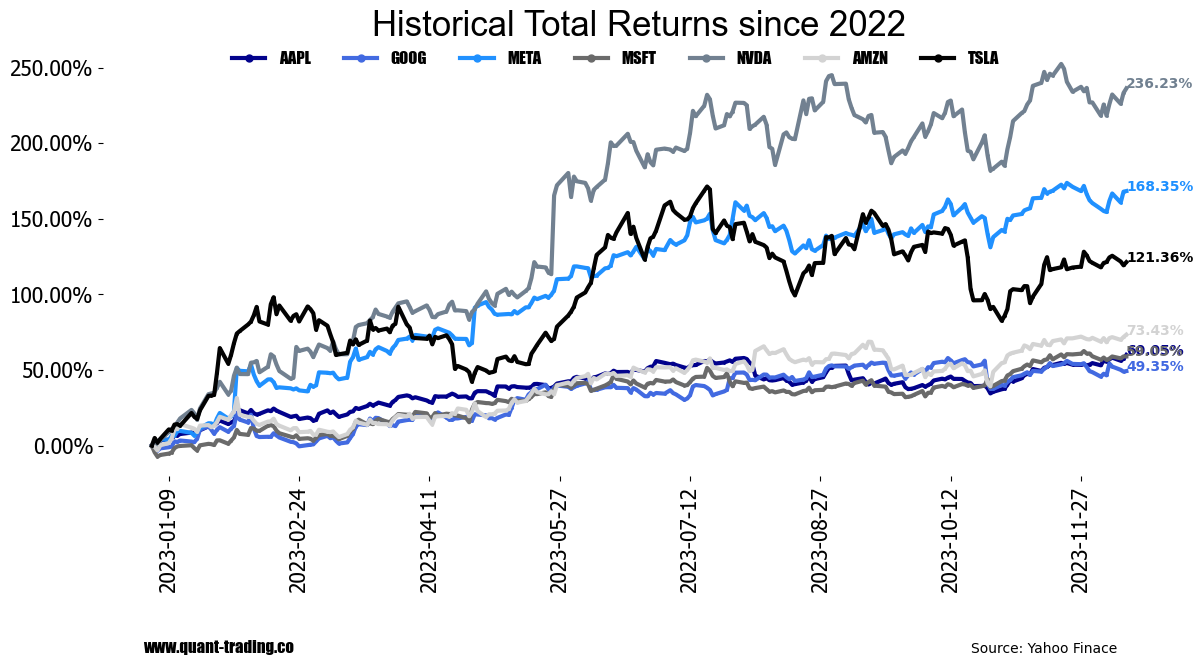

In [18]:
#CREATE CHART

font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=12)
tick_spacing = np.round(timeframe.days/8,0)
i = 0

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for key in DataFrameDict.keys():
    my_color = my_colors[i]    
    ax.plot(DataFrameDict[key]['Date'],DataFrameDict[key]['cum_ret']*100,marker='o', linestyle='solid',linewidth=3,color=my_color,label=key,alpha=0.99,markersize=1)
    ax.text(DataFrameDict[key]['Date'].iloc[-1], DataFrameDict[key]['cum_ret'].iloc[-1]*100,'{0:.2%}'.format(DataFrameDict[key]['cum_ret'].iloc[-1]) , color=my_color, fontsize=10,weight='bold')
    i = i + 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.85, 1.02),ncol=10,markerscale=5)
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax.title.set_fontfamily('arial')
ax.axis([None, None, None, None])
# vals = ax.get_yticks()
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.title("Historical Total Returns since " + str(start_year), size=25, family='Arial')
plt.box(on=None)

ax.set_facecolor('white') 

ax.text(start, (min_value-my_range/2)*100,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
ax.text(end - timeframe*0.2, (min_value-my_range/2)*100,'Source: Yahoo Finace' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)